---
# <b>1. Create harmonized/standardized PFT table<b>

In [2]:
import pandas as pd
import geopandas as gpd
import uuid
import matplotlib.pyplot as plt

## 1.a Concatenate fcover tables

In [3]:
sources = ['abr', 'akveg', 'ava', 'neon', 'sp']
dfs = []
for source in sources:
    path = f'{source}/output_data/{source}_standardized_fcover.csv'
    df = pd.read_csv(path, index_col=0)
    dfs.append(df)
fcover = pd.concat(dfs)
fcover.to_csv('harmonized_fcover_temp.csv')

## 1.b Fill in missing variables manually

## 1.c Load fixed table

In [4]:
fcover = pd.read_csv('harmonized_fcover.csv')

In [5]:
fcover.columns

Index(['plotName', 'deciduousShrubCover', 'deciduousTreeCover',
       'evergreenShrubCover', 'evergreenTreeCover', 'forbCover',
       'graminoidCover', 'nonvascularSumCover', 'bryophyteCover',
       'lichenCover', 'litterCover', 'waterCover', 'baregroundCover',
       'surveyYear', 'surveyMonth', 'surveyDay', 'plotRadius', 'latitudeY',
       'longitudeX', 'georefSource', 'georefAccuracy', 'coordEPSG',
       'dataSubsource', 'dataSource', 'surveyMethod', 'fcoverScale',
       'surveyPurpose', 'geometry', 'adminUnit', 'adminCountry', 'fireYears',
       'bioclimSubzone', 'duplicatedCoords', 'duplicatedDate'],
      dtype='object')

In [6]:
fcover.groupby('dataSubsource').count()

,plotName,deciduousShrubCover,deciduousTreeCover,evergreenShrubCover,evergreenTreeCover,forbCover,graminoidCover,nonvascularSumCover,bryophyteCover,lichenCover,...,surveyMethod,fcoverScale,surveyPurpose,geometry,adminUnit,adminCountry,fireYears,bioclimSubzone,duplicatedCoords,duplicatedDate
dataSubsource,,,,,,,,,,,,,,,,,,,,,
AIM NPR-A Timm Nawrocki,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,0,184,0,181
Atqasuk Vera Komarkova,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,0,31,0,31
Barrow DOE NGEE Victoria Sloan,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,0,48,0,48
Barrow IBP Tundra Biome Pat Webber,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,0,33,0,33
Flux Tower Zona Scott Davidson,140,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,0,140,0,140
NGEE-Arctic Amy Breen,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,0,98,0,95
Prudhoe ArcSEES road study Donald Walker,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,0,29,0,29
Prudhoe Bay Airport ArcSEES Donald Walker,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,0,27,2,27
Shell Onshore Matthew Macander,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,0,107,2,103


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler with the desired feature range
scaler = MinMaxScaler(feature_range=(0, 100))

# Fit and transform the data
cover_cols = [col for col in fcover.columns if 'Cover' in col]
fcover_scaled = pd.DataFrame(scaler.fit_transform(fcover[cover_cols]), columns=cover_cols)

## 1.d Plot PFT distribution

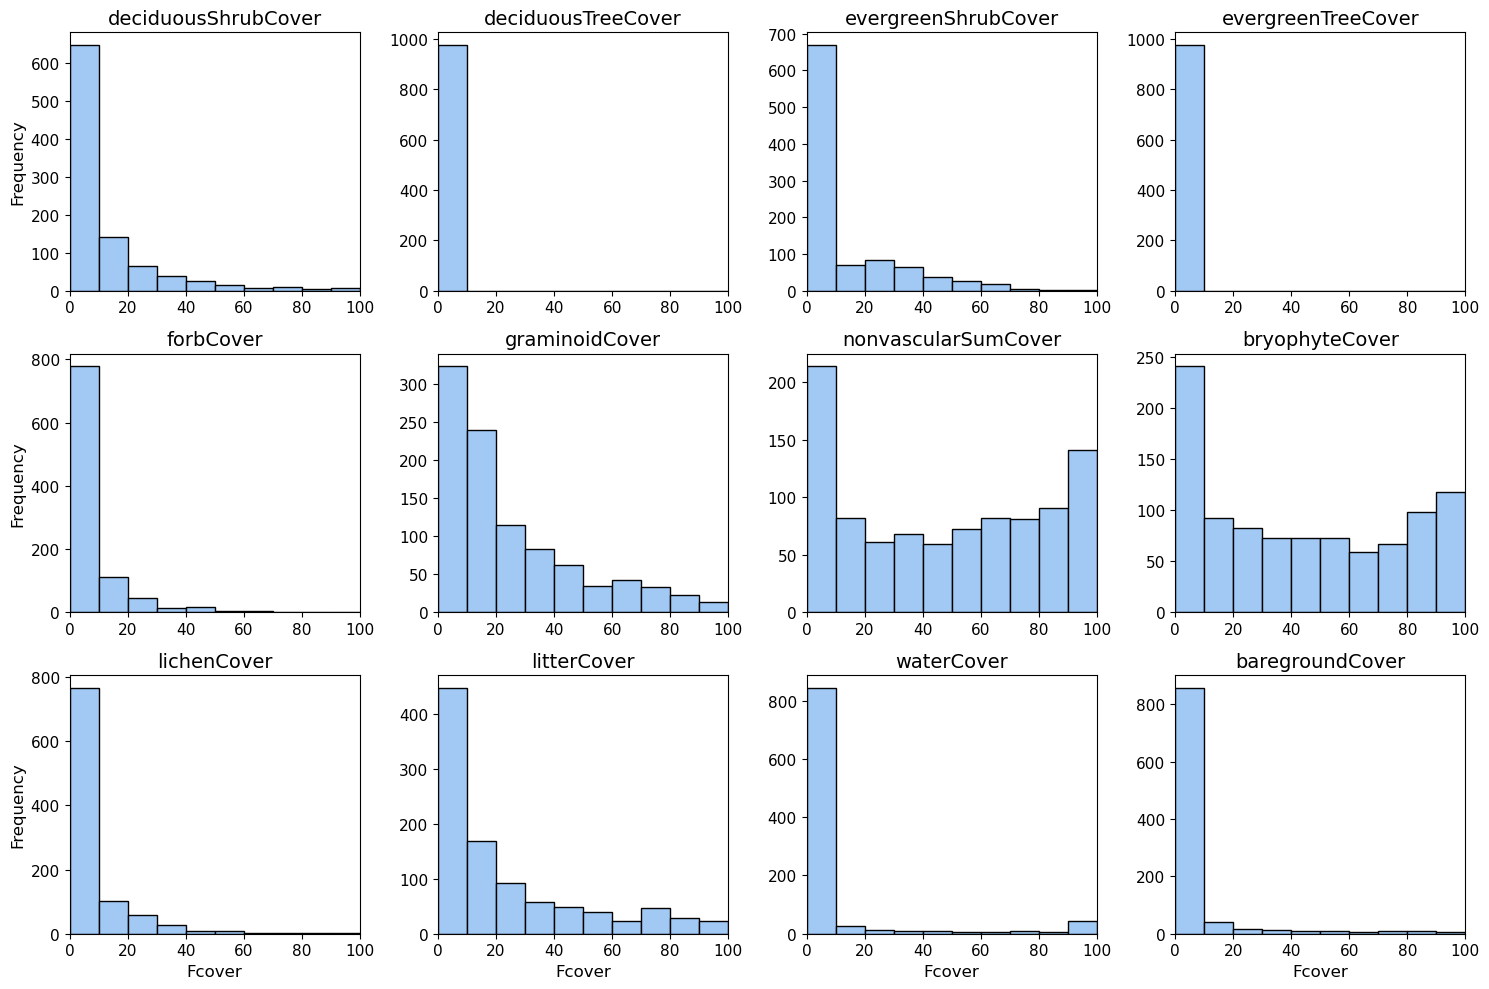

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns

# Assuming fcover is already defined and contains the necessary data

# List of fcover types (assuming columns represent different fcover types)
fcover_types = [col for col in fcover_scaled.columns if 'Cover' in col]

# Number of subplots (assuming 10 fcover types)
num_subplots = len(fcover_types)
nrows = 3
ncols = ceil(num_subplots / nrows)

# Determine the common x and y axis ranges
all_values = pd.concat([fcover_scaled[col].dropna() for col in fcover_types])
x_min, x_max = all_values.min(), all_values.max()

# Create a figure and subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), sharex=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set Seaborn style and color palette
palette = sns.color_palette("pastel")

# Define bin edges
bin_width = 10  # Adjust as needed
# num_bins = int((x_max - x_min) / bin_width)

# Define bin edges
bin_edges = range(int(x_min), int(x_max) + bin_width, bin_width)

# Plot each fcover type in a separate subplot
for i, fcover_type in enumerate(fcover_types):
    axs[i].hist(fcover[fcover_type], bins=bin_edges, color=palette[0], edgecolor='black', align='mid')
    axs[i].set_title(fcover_type, fontsize=14)
    axs[i].set_xlim(x_min, x_max)
    axs[i].tick_params(axis='both', which='major', labelsize=11)
    axs[i].xaxis.set_tick_params(labelbottom=True)
    
    # Set x-axis label only for the bottom row
    if i >= (nrows - 1) * ncols:
        axs[i].set_xlabel('Fcover', fontsize=12)
    
    # Set y-axis label only for the far-left column
    if i % ncols == 0:
        axs[i].set_ylabel('Frequency', fontsize=12)
    
# # Set y-axis limits based on the highest bin count across all subplots
# max_y = max(ax.get_ylim()[1] for ax in axs[:num_subplots])
# for ax in axs[:num_subplots]:
#     ax.set_ylim(0, max_y)

# Remove any empty subplots
for j in range(num_subplots, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()

---
# 2. Create harmonized/standardized species table

In [15]:
sources = ['abr', 'akveg', 'ava', 'neon', 'sp']
dfs = []
for source in sources:
    path = f'{source}/output_data/{source}_all_species.csv'
    df = pd.read_csv(path, index_col=0)
    dfs.append(df)
species_fcover = pd.concat(dfs, axis=0)

In [20]:
nan_accepted_names = species_fcover[species_fcover['acceptedName'].isna()]
unique_species_with_nan_df = nan_accepted_names[['datasetSpeciesName']].drop_duplicates().reset_index(drop=True)
unique_species_with_nan_df.to_csv('standard_species_names_02.csv')